## keras使用例：2値分類

チューニング、CV等は省略

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

%matplotlib inline

print(tf.__version__)

2.0.0-rc0


In [2]:
# sample dataset
num_samples = 4000
noise = 0.3

X, y = make_moons(n_samples=num_samples, noise=noise)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

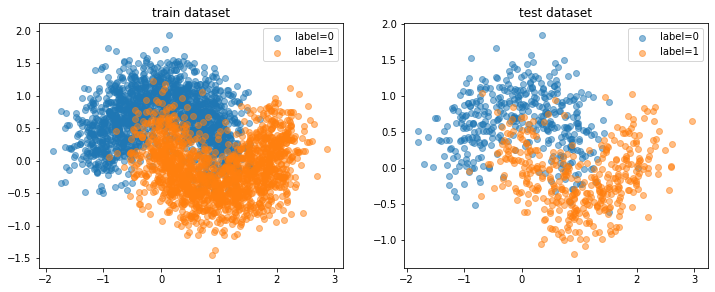

In [3]:
plt.figure(figsize=(12, 4.5))

plt.subplot(121)
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.5, label="label=1")
plt.title("train dataset")
plt.legend()

plt.subplot(122)
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], alpha=0.5, label="label=0")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], alpha=0.5, label="label=1")
plt.title("test dataset")
plt.legend();

## Sequential API

In [4]:
# model
def build_nn_model():
    model = keras.Sequential([
        keras.layers.Dense(10, activation="relu", input_shape=(2,)),
        keras.layers.Dense(10, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    return model

In [5]:
model = build_nn_model()
optimizer = keras.optimizers.Adam()
model.compile(
    optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

In [6]:
history = model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True
    )

W0827 19:46:52.094261 13988 deprecation.py:323] From C:\Users\Ryo\Anaconda3\envs\py37tf\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3200 samples, validate on 800 samples
Epoch 1/30
3200/3200 [==============================] - 2s 505us/sample - loss: 0.5343 - accuracy: 0.7366 - val_loss: 0.4218 - val_accuracy: 0.8200
Epoch 2/30
3200/3200 [==============================] - 1s 232us/sample - loss: 0.3681 - accuracy: 0.8413 - val_loss: 0.3531 - val_accuracy: 0.8462
Epoch 3/30
3200/3200 [==============================] - 1s 230us/sample - loss: 0.3297 - accuracy: 0.8525 - val_loss: 0.3397 - val_accuracy: 0.8462
Epoch 4/30
3200/3200 [==============================] - 1s 208us/sample - loss: 0.3161 - accuracy: 0.8616 - val_loss: 0.3308 - val_accuracy: 0.8575
Epoch 5/30
3200/3200 [==============================] - 1s 170us/sample - loss: 0.3093 - accuracy: 0.8684 - val_loss: 0.3230 - val_accuracy: 0.8625
Epoch 6/30
3200/3200 [==============================] - 0s 147us/sample - loss: 0.3006 - accuracy: 0.8731 - val_loss: 0.3143 - val_accuracy: 0.8725
Epoch 7/30
3200/3200 [==============================] - 0s 141us/

In [7]:
print("test loss & accuracy: ", model.evaluate(X_test, y_test, verbose=0))

test loss & accuracy:  [0.24520772725343704, 0.90375]


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

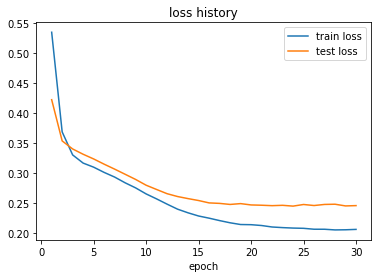

In [9]:
plt.plot(np.arange(1, 31), history.history["loss"], label="train loss")
plt.plot(np.arange(1, 31), history.history["val_loss"], label="test loss")
plt.xlabel("epoch")
plt.title("loss history")
plt.legend();

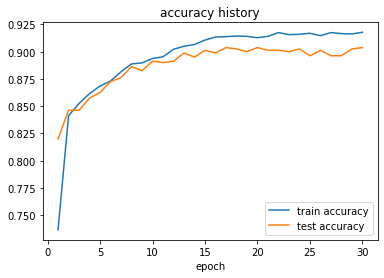

In [10]:
plt.plot(np.arange(1, 31), history.history["accuracy"], label="train accuracy")
plt.plot(np.arange(1, 31), history.history["val_accuracy"], label="test accuracy")
plt.xlabel("epoch")
plt.title("accuracy history")
plt.legend();

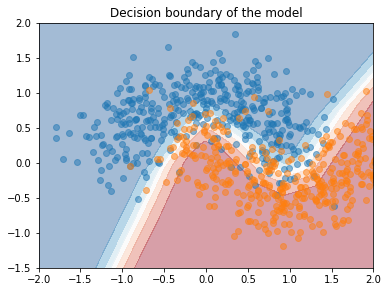

In [11]:
x0 = np.linspace(-2, 3, 200)
x1 = np.linspace(-1.5, 2, 200)

xx0, xx1 = np.meshgrid(x0, x1)

X_grid = np.vstack((xx0.ravel(), xx1.ravel())).T

z = model.predict(X_grid)

plt.figure(figsize=(6, 4.5))
plt.contourf(xx0, xx1, z.reshape((200, 200)), cmap=plt.cm.RdBu_r, alpha=0.4)
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], alpha=0.5)
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], alpha=0.5)
plt.xlim(-2, 2)
plt.ylim(-1.5, 2)
plt.grid(False)
plt.title("Decision boundary of the model");

## Functional API

In [12]:
inputs = keras.Input(shape=(2,), name="input")
x = keras.layers.Dense(10, activation="relu")(inputs)
x = keras.layers.Dense(10, activation="relu")(x)
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="binary_classif_model")

In [13]:
model.summary()

Model: "binary_classif_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


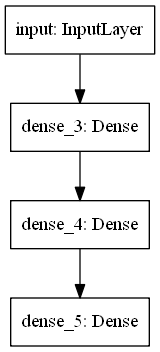

In [14]:
keras.utils.plot_model(model)

In [15]:
optimizer = keras.optimizers.Adam()
model.compile(
    optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train, y_train,
    batch_size=16,
    epochs=30,
    verbose=1,
    validation_data=(X_test, y_test),
    shuffle=True
)

Train on 3200 samples, validate on 800 samples
Epoch 1/30
3200/3200 [==============================] - 1s 452us/sample - loss: 0.5695 - accuracy: 0.7147 - val_loss: 0.4525 - val_accuracy: 0.8288
Epoch 2/30
3200/3200 [==============================] - 1s 181us/sample - loss: 0.3864 - accuracy: 0.8503 - val_loss: 0.3690 - val_accuracy: 0.8525
Epoch 3/30
3200/3200 [==============================] - 1s 166us/sample - loss: 0.3492 - accuracy: 0.8537 - val_loss: 0.3606 - val_accuracy: 0.8525
Epoch 4/30
3200/3200 [==============================] - 1s 172us/sample - loss: 0.3415 - accuracy: 0.8547 - val_loss: 0.3540 - val_accuracy: 0.8575
Epoch 5/30
3200/3200 [==============================] - 1s 173us/sample - loss: 0.3346 - accuracy: 0.8603 - val_loss: 0.3479 - val_accuracy: 0.8575
Epoch 6/30
3200/3200 [==============================] - 1s 174us/sample - loss: 0.3269 - accuracy: 0.8625 - val_loss: 0.3425 - val_accuracy: 0.8587
Epoch 7/30
3200/3200 [==============================] - 1s 172us/